# First Analysis - RJ Election 2022
Apresenta a primeira análise dos dados com uma exibição base em python.

Exibe o tipo dos dados coletados em tabelas e permite uma observação primitiva de sua organização.

In [1]:
# Import de bibliotecas
try:
  import matplotlib
  print('Matplotlib is already installed!')
  print(f'Matplotlib version: {matplotlib.__version__}\n')
except ImportError:
  print('Installing Matplotlib...')
  !pip install matplotlib

try:
  import numpy
  print('Numpy is already installed!')
  print(f'Numpy version: {numpy.__version__}\n')
except ImportError:
  print('Installing Numpy...')
  !pip install numpy

try:
  import pandas
  print('Pandas is already installed!')
  print(f'Pandas version: {pandas.__version__}\n')
except ImportError:
  print('Installing Pandas...')
  !pip install pandas

try:
    import geopandas as gpd
    print('GeoPandas is already installed!')
    print(f'GeoPandas version: {gpd.__version__}\n')
except ImportError:
    print('Installing GeoPandas...')
    !pip install geopandas
    import geopandas as gpd
    print(f'GeoPandas version: {gpd.__version__}\n')

try:
  import pyarrow as pa
  print('PyArrow is already installed!')
  print(f'PyArrow version: {pa.__version__}\n')
except ImportError:
  print('Installing PyArrow...')
  !pip install pyarrow

try:
  import os
  print('OS is already installed!')
except ImportError:
  print('Installing OS...')
  !pip install os


Matplotlib is already installed!
Matplotlib version: 3.10.3

Numpy is already installed!
Numpy version: 2.2.5

Pandas is already installed!
Pandas version: 2.2.3

GeoPandas is already installed!
GeoPandas version: 1.0.1

PyArrow is already installed!
PyArrow version: 20.0.0

OS is already installed!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa

import geopandas as gpd

In [3]:
# Caminho dos dados

path_alfabetizacao_csv = "./DADOS/Alfabetizacao/Agregados_por_municipios_alfabetizacao_BR.csv"
path_seguranca_csv = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
path_votos_parquet = "./DADOS/TSE/1turnoRj.parquet"
path_votos_TSE_csv = "./DADOS/TSE/votacao_secao_2022_RJ.csv"
path_malha_zip = "./DADOS/MalhaGeometrica/rj_municipios.zip"


# Leitura dos arquivos para dataframes -> usando pandas

# Lê o arquivo CSV e carrega em um DataFrame
df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv,  encoding='latin1', sep=';')
df_seguranca = pd.read_csv(path_seguranca_csv,  encoding='latin1', sep=';')

# df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep='')
df = pd.read_parquet(path_votos_parquet)
df.to_csv(path_votos_TSE_csv, index=False, sep=';')
df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep=';')

In [4]:
# Verificação das primeiras linhas dos dados

# Exibe as primeiras 5 linhas do DataFrame
print("Data frame de alfabetização: \n")
print(df_alfabetizacao.head())

print("Data frame de segurança: \n")
print(df_seguranca.head())
# print(df_votos.head())

Data frame de alfabetização: 

    CD_MUN                 NM_MUN  V00644  V00645  V00646  V00647  V00648  \
0  1100015  Alta Floresta D'Oeste    1644    1514    1557    1643    1511   
1  1100023              Ariquemes    7666    8193    8053    7656    7741   
2  1100031                 Cabixi     373     246     306     373     402   
3  1100049                 Cacoal    6299    7292    7282    7029    6858   
4  1100056             Cerejeiras    1142    1044    1275    1285    1222   

   V00649  V00650  V00651  ...  V00996  V00997  V00998  V00999  V01000  \
0    1576    1541    1352  ...     109     226     119      40      73   
1    7404    6582    5774  ...     484    1106     506     328     591   
2     425     338     399  ...       3      29      21       3       9   
3    6765    5774    5377  ...     489    1181     401     279     430   
4    1142    1083     967  ...     101     172      84      36      90   

   V01001  V01002  V01003  V01004  V01005  
0      51     107

In [5]:
rj = gpd.read_file('./DADOS/MalhaGeometrica/rj_municipios/33MUE250GC_SIR.shp')
rj.head()


,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.0895 -21.62893, -42.08912 -21.62..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


<Axes: >

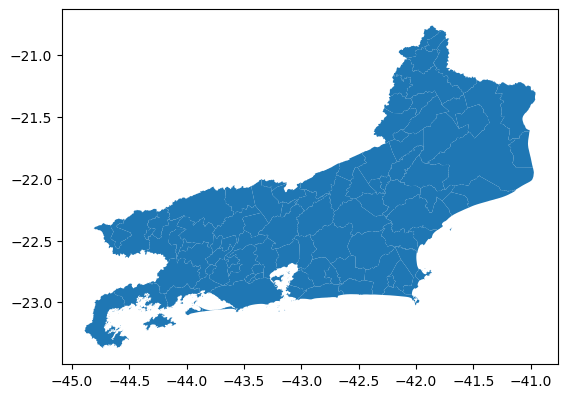

In [6]:
rj.plot()

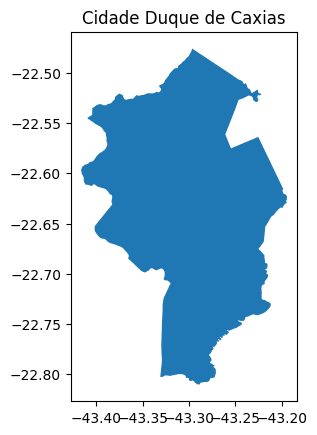

In [7]:
duque_de_caxias_city = rj[rj.NM_MUNICIP == 'DUQUE DE CAXIAS'].reset_index(drop=True)
ax2 = duque_de_caxias_city.plot()
ax2.set_title('Cidade Duque de Caxias');

In [8]:
# Leitura do arquivo CSV do TSE com tratamento manual para conversão com separador correto
df_raw = pd.read_csv(path_votos_TSE_csv, header=None)

df_votos = df_raw[0].str.replace('"', '').str.split(';', expand=True)

df_votos.columns = df_votos.iloc[0]
df_votos = df_votos[1:] 

df_votos = df_votos.reset_index(drop=True)

print(df_votos.head())
print(df_votos.columns[:10])
print(df_votos.shape)

0  DT_GERACAO HH_GERACAO ANO_ELEICAO CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  31/10/2022   15:51:07        2022               0  Eleição Ordinária   
1  31/10/2022   15:51:07        2022               0  Eleição Ordinária   
2  31/10/2022   15:51:07        2022               0  Eleição Ordinária   
3  31/10/2022   15:51:07        2022               0  Eleição Ordinária   
4  31/10/2022   15:51:07        2022               0  Eleição Ordinária   

0 CD_PLEITO   DT_PLEITO NR_TURNO CD_ELEICAO                  DS_ELEICAO  ...  \
0       407  30/10/2022        2        545  Eleição Geral Federal 2022  ...   
1       407  30/10/2022        2        545  Eleição Geral Federal 2022  ...   
2       407  30/10/2022        2        545  Eleição Geral Federal 2022  ...   
3       407  30/10/2022        2        545  Eleição Geral Federal 2022  ...   
4       407  30/10/2022        2        545  Eleição Geral Federal 2022  ...   

0 CD_FLASHCARD_URNA_EFETIVADA DT_CARGA_URNA_EFETIVADA DS_CARGO_PERGU

In [9]:
df_votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:51:07,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,E356201E,19/09/2022 15:19:00,1 - 10,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:38,17,30/10/2022 17:04:34,-1,-1
1,31/10/2022,15:51:07,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,E356201E,19/09/2022 15:19:00,1 - 10,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:38,17,30/10/2022 17:04:34,-1,-1
2,31/10/2022,15:51:07,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,E356201E,19/09/2022 15:19:00,1 - 10,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:38,17,30/10/2022 17:04:34,-1,-1
3,31/10/2022,15:51:07,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,E356201E,19/09/2022 15:19:00,1 - 10,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:38,17,30/10/2022 17:04:34,-1,-1
4,31/10/2022,15:51:07,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,...,E356201E,19/09/2022 15:35:00,1 - 11,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:37,19,30/10/2022 17:05:57,-1,-1


In [10]:
df_votos.columns.tolist()

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'CD_PLEITO',
 'DT_PLEITO',
 'NR_TURNO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'SG_UF',
 'CD_MUNICIPIO',
 'NM_MUNICIPIO',
 'NR_ZONA',
 'NR_SECAO',
 'NR_LOCAL_VOTACAO',
 'CD_CARGO_PERGUNTA',
 'DS_CARGO_PERGUNTA',
 'NR_PARTIDO',
 'SG_PARTIDO',
 'NM_PARTIDO',
 'DT_BU_RECEBIDO',
 'QT_APTOS',
 'QT_COMPARECIMENTO',
 'QT_ABSTENCOES',
 'CD_TIPO_URNA',
 'DS_TIPO_URNA',
 'CD_TIPO_VOTAVEL',
 'DS_TIPO_VOTAVEL',
 'NR_VOTAVEL',
 'NM_VOTAVEL',
 'QT_VOTOS',
 'NR_URNA_EFETIVADA',
 'CD_CARGA_1_URNA_EFETIVADA',
 'CD_CARGA_2_URNA_EFETIVADA',
 'CD_FLASHCARD_URNA_EFETIVADA',
 'DT_CARGA_URNA_EFETIVADA',
 'DS_CARGO_PERGUNTA_SECAO',
 'DS_AGREGADAS',
 'DT_ABERTURA',
 'DT_ENCERRAMENTO',
 'QT_ELEITORES_BIOMETRIA_NH',
 'DT_EMISSAO_BU',
 'NR_JUNTA_APURADORA',
 'NR_TURMA_APURADORA']

In [11]:
# Quantidade de municipios em cada dataframe (usando .unique)
print("Quantidade de municípios DF_Alfabetização:", df_alfabetizacao['CD_MUN'].nunique())
print("Quantidade de municípios DF_Segurança:", df_seguranca['fmun_cod'].nunique())
print("Quantidade de municípios Malha Geométrica RJ:", rj['CD_GEOCODM'].nunique())
print("Quantidade de municípios DF_Votos_TSE:", df_votos['CD_MUNICIPIO'].nunique())

Quantidade de municípios DF_Alfabetização: 5570
Quantidade de municípios DF_Segurança: 92
Quantidade de municípios Malha Geométrica RJ: 92
Quantidade de municípios DF_Votos_TSE: 92


In [12]:
# Células em branco
print("Quantidade de células em branco DF_Alfabetização:", df_alfabetizacao.isnull().sum().sum())
print("Quantidade de células em branco DF_Segurança:", df_seguranca.isnull().sum().sum())
print("Quantidade de células em branco Malha Geométrica RJ:", rj.isnull().sum().sum())
print("Quantidade de células em branco DF_Votos_TSE:", df_votos.isnull().sum().sum())


Quantidade de células em branco DF_Alfabetização: 0
Quantidade de células em branco DF_Segurança: 0
Quantidade de células em branco Malha Geométrica RJ: 0
Quantidade de células em branco DF_Votos_TSE: 0


In [13]:
# Dados duplicados
print("Quantidade de dados duplicados DF_Alfabetização:", df_alfabetizacao.duplicated().sum())
print("Quantidade de dados duplicados DF_Segurança:", df_seguranca.duplicated().sum())
print("Quantidade de dados duplicados Malha Geométrica RJ:", rj.duplicated().sum())
print("Quantidade de dados duplicados DF_Votos_TSE:", df_votos.duplicated().sum())

Quantidade de dados duplicados DF_Alfabetização: 0
Quantidade de dados duplicados DF_Segurança: 0
Quantidade de dados duplicados Malha Geométrica RJ: 0
Quantidade de dados duplicados DF_Votos_TSE: 0


In [14]:

path_alfabetizacao_csv_filtrado = "./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv"

if not os.path.exists(path_alfabetizacao_csv_filtrado):
    # Le CSV novamente por garantia
    df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv, sep=';', encoding='latin1')

    df_alfabetizacao.columns = df_alfabetizacao.columns.str.strip()
    print("Colunas do CSV:", df_alfabetizacao.columns.tolist())

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_base_existentes = [c for c in colunas_base if c in df_alfabetizacao.columns]

    if len(colunas_base_existentes) < len(colunas_base):
        raise ValueError(f"Algumas colunas base não existem no CSV: {colunas_base}.\nColunas existentes: {df_alfabetizacao.columns.tolist()}")

    # Filtrar apenas as colunas V00748 a V00760 presentes no CSV
    colunas_alfabetizacao = []
    for i in range(48, 61):  # de 48 até 60
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)


    colunas_desejadas = colunas_base_existentes + colunas_alfabetizacao

    df_filtrado = df_alfabetizacao[colunas_desejadas]

    # Salvar CSV filtrado pronto
    df_filtrado.to_csv(path_alfabetizacao_csv_filtrado, sep=';', index=False, quoting=1)

    print(f"CSV filtrado criado com sucesso: {path_alfabetizacao_csv_filtrado}")


Colunas do CSV: ['CD_MUN', 'NM_MUN', 'V00644', 'V00645', 'V00646', 'V00647', 'V00648', 'V00649', 'V00650', 'V00651', 'V00652', 'V00653', 'V00654', 'V00655', 'V00656', 'V00657', 'V00658', 'V00659', 'V00660', 'V00661', 'V00662', 'V00663', 'V00664', 'V00665', 'V00666', 'V00667', 'V00668', 'V00669', 'V00670', 'V00671', 'V00672', 'V00673', 'V00674', 'V00675', 'V00676', 'V00677', 'V00678', 'V00679', 'V00680', 'V00681', 'V00682', 'V00683', 'V00684', 'V00685', 'V00686', 'V00687', 'V00688', 'V00689', 'V00690', 'V00691', 'V00692', 'V00693', 'V00694', 'V00695', 'V00696', 'V00697', 'V00698', 'V00699', 'V00700', 'V00701', 'V00702', 'V00703', 'V00704', 'V00705', 'V00706', 'V00707', 'V00708', 'V00709', 'V00710', 'V00711', 'V00712', 'V00713', 'V00714', 'V00715', 'V00716', 'V00717', 'V00718', 'V00719', 'V00720', 'V00721', 'V00722', 'V00723', 'V00724', 'V00725', 'V00726', 'V00727', 'V00728', 'V00729', 'V00730', 'V00731', 'V00732', 'V00733', 'V00734', 'V00735', 'V00736', 'V00737', 'V00738', 'V00739', 'V0

In [15]:
# Resumo das modificações - adicionar também no docs!

# Plot de informações estatísticas

In [16]:
# Apresentar imagem do OMT-G 